In [1]:
var = 'bio'
year = '2016'

In [4]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
#from matplotlib import reload
import xarray as xr
from xarray import Dataset as ds
import sys
sys.path.append('..')
sys.path.append('../maps_signals')
sys.path.append('./extraction_scripts')
import map_fxn as mf
import cluster_fxn as cf
%matplotlib inline
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:])
import colorsys
import scipy.io as sio
import cmocean 
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools,
    visualisations,
)

In [5]:
# reload(mf)
# reload(cf)

In [6]:
## xkcd colours
# https://xkcd.com/color/rgb.txt


colors = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
        "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
        "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
        
        "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
        "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
        "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
        "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
        "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C",
        "#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800",
        "#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51",
        "#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58",
        
        "#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D",
        "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176",
        "#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5",
        "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4",
        "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01",
        "#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966",
        "#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0",
        "#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C",

        "#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868",
        "#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183",
        "#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433",
        "#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F",
        "#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E",
        "#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F",
        "#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00",
        "#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66",
        
        "#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25",
        "#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B"]


In [7]:
w = cmocean.cm.phase((range(0, 100)))
#print(w)
print(w[99,:])

[0.73376055 0.27554128 0.91502    1.        ]


In [8]:
fs = './datamats//' + var + '_' + year + 'hind_cl.mat'
fdir = './figs/'

### for bio BM 

fs = './datamats/datamats_bio_BM/' + var + '_' + year + 'hind_BM_cl.mat'
#masked for ved
#fs = './clmats_n/' + var + '_' + year + 'hind_n_cl_MASK.mat'
noclust = 15
n = 100

mat_contents = sio.loadmat(fs)
#print(mat_contents)

cl = np.squeeze((mat_contents['clusters']))
print(cl)
w = cl.shape
cl_2 = cl[1,:]
print(cl_2)
print(w)
    
for i in range(0,noclust):
    cln = i+1
    cln2 = str(cln)

    if len(cln2) ==1:
        cln2 = '0'+cln2

    tit = var +', year ' + year +', no. clusters: ' +str(cln)
    
    cl_this = cl[i,:]
    markersize = 60
    titfontsize = 25
    legfontsize = 10
    fsx = 20
    fsy = 25
    fname = fdir  + var + year + 'map_cl_' + str(cln2) + '.png'
    #for biomass clusters
    fname = fdir  + var + '_BM_' + year + 'map_cl_' + str(cln2) + '.png'

    cf.map_clusters(tit,cln,cl_this,fsx,fsy,markersize,titfontsize,legfontsize,fname,colors)



FileNotFoundError: [Errno 2] No such file or directory: './datamats/datamats_bio_BM/bio_2016hind_BM_cl.mat'

#### cluster code - for any given year, var, no-clusters - takes a pre-existing ax

In [9]:
def clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit):

    fs = './datamats/' + var + '_' + year + 'hind_cl.mat'
    mat_contents = sio.loadmat(fs)
    cl = np.squeeze((mat_contents['clusters']))
    cl_this = cl[no_clusters-1,:]
    np.shape(cl_this)
    viz_tools.set_aspect(ax1)   
    fmask = (grid.fmask[0,0,:,:])    
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1)


    ax1.set_ylim([0,898])
    ax1.set_xlim([0,398])

    stn_x, stn_y = mf.make_stns(10)
    d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

    for j in range(1,no_clusters+1):
        cluster = np.where(cl_this == j)
        cluster = np.squeeze(cluster)
        #find the xs and ys of the stations in a given cluster
        c1_x = np.take(d_stn_x,cluster)
        c1_y = np.take(d_stn_y,cluster)
        pts = ax1.scatter(c1_x,c1_y,s=markersize,c=colors[j-1], label=j ,marker='o')
        ax1.set_xticklabels( () ) 
        ax1.set_yticklabels( () ) 
    plt.legend(loc=1, fontsize = legfontsize)
    ax1.set_title(tit,fontsize = legfontsize + 2)

FileNotFoundError: [Errno 2] No such file or directory: './datamats/fwi_2013hind_cl.mat'

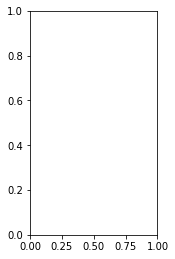

In [10]:
fact = 1.4
ms = 4
markersize = 10
legfontsize = 8

fig = plt.figure(figsize=(7.5*fact, 10*fact))

#####FWI
ax1 = plt.subplot2grid((3,4),(0,0))
year = '2013'; var = 'fwi'; no_clusters = 5; tit = '2013, FWI'
colors = ['dodgerblue', 'blue', 'rosybrown', 'saddlebrown', 'powderblue']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(0,1))
year = '2014'; var = 'fwi'; no_clusters = 5; tit = '2014, FWI'
colors = ['rosybrown','saddlebrown','powderblue','dodgerblue','blue','fuchsia']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(0,2))
year = '2015'; var = 'fwi'; no_clusters = 5; tit = '2015, FWI'
colors = ['rosybrown','saddlebrown','powderblue','dodgerblue','blue']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(0,3))
year = '2016'; var = 'fwi'; no_clusters = 5; tit = '2016, FWI'
colors = ['powderblue','dodgerblue','rosybrown','blue','saddlebrown','fuchsia']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

##halocline
ax1 = plt.subplot2grid((3,4),(1,0))
year = '2013'; var = 'halo'; no_clusters = 5; tit = '2013, halo'
colors = ['dodgerblue', 'saddlebrown', 'black', 'lightgrey', 'gray']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(1,1))
year = '2014'; var = 'halo'; no_clusters = 5; tit = '2014, halo'
colors = ['dodgerblue','saddlebrown','black','lightgrey','gray']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(1,2))
year = '2015'; var = 'halo'; no_clusters = 5; tit = '2015, halo'
colors = ['gray','lightgrey','dodgerblue','saddlebrown','black']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(1,3))
year = '2016'; var = 'halo'; no_clusters = 5; tit = '2016, halo'
colors = ['lightgray','black','saddlebrown','dodgerblue','gray','fuchsia']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

### BIO BIO BIO
ax1 = plt.subplot2grid((3,4),(2,0))
year = '2013'; var = 'bio'; no_clusters = 5; tit = '2013, bio'
colors = ['red','brown','green','blue','yellow','fuchsia']
#
colors = ['saddlebrown', 'dodgerblue', 'lightgrey', 'k', 'rosybrown']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(2,1))
##oth row
year = '2014'; var = 'bio'; no_clusters = 5; tit = '2014, bio'
colors = ['saddlebrown','dodgerblue','lightgrey','black','rosybrown','fuchsia']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(2,2))
##oth row
year = '2015'; var = 'bio'; no_clusters = 5; tit = '2015, bio'
colors = ['black','dodgerblue','saddlebrown','rosybrown','lightgrey']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)

ax1 = plt.subplot2grid((3,4),(2,3))
##oth row
year = '2016'; var = 'bio'; no_clusters = 5; tit = '2016, bio'
colors = ['dodgerblue','lightgrey','saddlebrown','black','rosybrown','fuchsia']
clusters_spec(ax1,year,var,no_clusters,colors,markersize,\
                 legfontsize,tit)
plt.tight_layout()
plt.savefig('./maps_2013-6.jpg')

In [11]:
def clusters_spec_clusID(ax1,year,var,cluslist,colors,markersize,\
                 legfontsize,tit):

    fs = './datamats/' + var + '_' + year + 'hind_cl.mat'
    mat_contents = sio.loadmat(fs)
    cl = np.squeeze((mat_contents['clusters']))
    cl_this = cl[no_clusters-1,:]
    np.shape(cl_this)
    viz_tools.set_aspect(ax1)   
    fmask = (grid.fmask[0,0,:,:])    
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1)


    ax1.set_ylim([0,898])
    ax1.set_xlim([0,398])

    stn_x, stn_y = mf.make_stns(10)
    d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

    for j in range(1,len(cluslist)):
        
        cluster = np.where(cl_this == cluslist[j])
        cluster = np.squeeze(cluster)
        #find the xs and ys of the stations in a given cluster
        c1_x = np.take(d_stn_x,cluster)
        c1_y = np.take(d_stn_y,cluster)
        pts = ax1.scatter(c1_x,c1_y,s=markersize,c=colors[j-1], label=j ,marker='o')
        ax1.set_xticklabels( () ) 
        ax1.set_yticklabels( () ) 
    plt.legend(loc=1, fontsize = legfontsize)
    ax1.set_title(tit,fontsize = legfontsize + 2)